In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.optim as optim

/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/riobanerjee/miniforge3/envs/mlenv/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/riobanerjee/miniforge3/envs/mlenv/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


Importing MNIST Dataset

In [22]:
trainset = datasets.MNIST('train', download=False, train=True) #Download True first time
valset = datasets.MNIST('test', download=False, train=False)

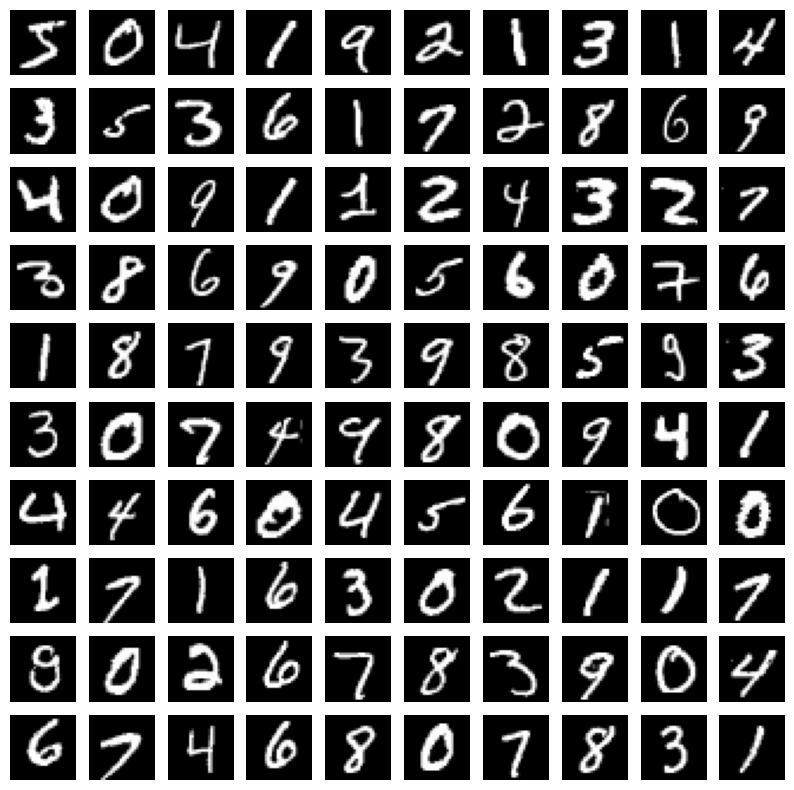

In [23]:
#Plotting them
fig, ax = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(trainset[i * 10 + j][0], cmap='gray')
        ax[i, j].axis('off')
plt.show()

In [24]:
# Change the image to tensor
tensor_transform = transforms.ToTensor()
trainset = datasets.MNIST('train', download=False, train=True, transform=tensor_transform)
valset = datasets.MNIST('test', download=False, train=False, transform=tensor_transform)

In [44]:
batch_size = 100
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(valset, batch_size=batch_size, shuffle=False)

In [45]:
for X, y in train_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([100, 1, 28, 28])
Shape of y: torch.Size([100]) torch.int64


In [46]:
input_size = 784
output_size = 10
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()  # Flatten 28x28 image into 784 vector
        self.fc1 = nn.Linear(input_size, 128)  # First fully connected layer
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(128, output_size)  # Output layer for 10 classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()

In [47]:
# Step 3: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Stochastic Gradient Descent

# Lists to store training loss and test accuracy for plotting
losses = []
accuracies = []

# Step 4: Train the model
epochs = 5
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    # Step 5: Evaluate the model
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient computation for evaluation
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    print(f"Accuracy on the test set: {accuracy:.2f}%")

Epoch [1/5], Loss: 0.5639
Accuracy on the test set: 91.56%
Epoch [2/5], Loss: 0.2721
Accuracy on the test set: 93.26%
Epoch [3/5], Loss: 0.2186
Accuracy on the test set: 94.47%
Epoch [4/5], Loss: 0.1812
Accuracy on the test set: 95.24%
Epoch [5/5], Loss: 0.1556
Accuracy on the test set: 95.75%


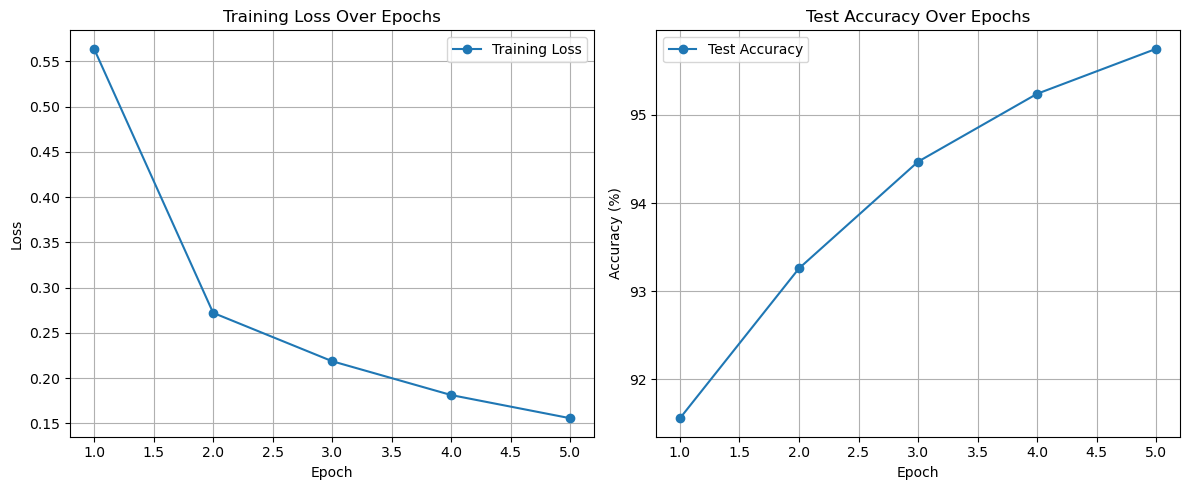

In [48]:
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid()
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.2244
Accuracy on the test set: 98.33%
Epoch [2/5], Loss: 0.0904
Accuracy on the test set: 98.72%
Epoch [3/5], Loss: 0.0697
Accuracy on the test set: 98.79%
Epoch [4/5], Loss: 0.0564
Accuracy on the test set: 98.93%
Epoch [5/5], Loss: 0.0518
Accuracy on the test set: 99.13%


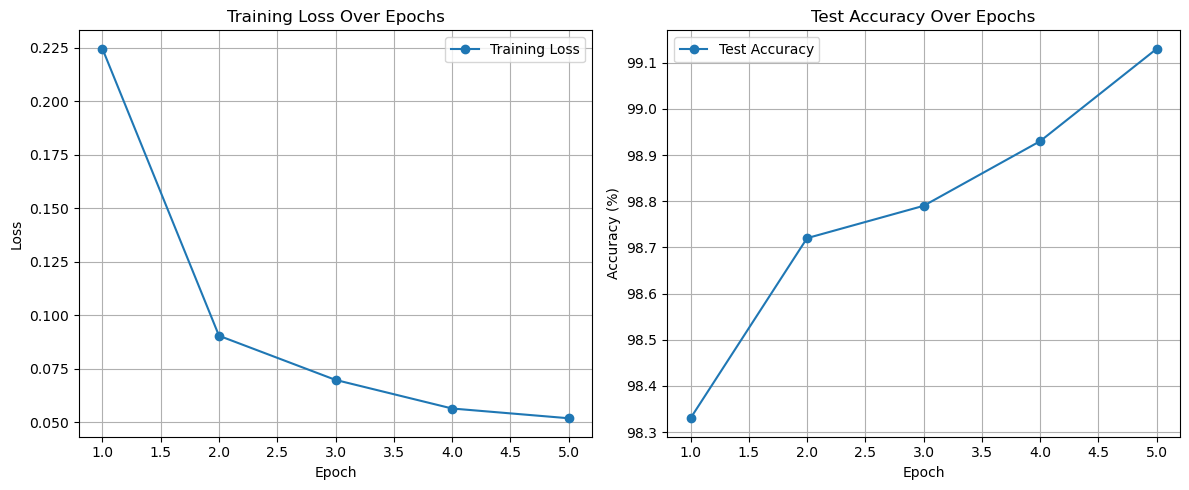

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=False, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Step 2: Define the improved neural network
class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)  # Output: 32x28x28
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # Output: 64x28x28
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Output: 64x14x14
        self.dropout1 = nn.Dropout(0.25)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional layers with ReLU and pooling
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout1(x)

        # Flatten
        x = x.view(x.size(0), -1)  # Flatten 64x14x14 to a vector

        # Fully connected layers with ReLU and dropout
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

model = ImprovedCNN()

# Step 3: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store metrics
losses = []
accuracies = []

# Step 4: Train the model
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    # Evaluate model
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    print(f"Accuracy on the test set: {accuracy:.2f}%")

# Step 5: Plot training loss and test accuracy
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), losses, marker='o', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid()
plt.legend()

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), accuracies, marker='o', label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
